In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings("ignore"
)

In [2]:
data =pd.read_csv(r'Datasets\cleaned_dataset1_encoded.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,0,0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,Good,50.0000,False,False,True,15.0000,1.0186,15.0000
1,1,1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,Bad,38.0000,False,False,True,32.0000,1.0189,32.0000
2,2,2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,Good,37.0000,False,False,True,32.0000,1.0019,32.0000
3,3,3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,Good,32.0000,False,False,True,33.0000,1.0189,33.0000
4,4,4,8a858e785acd3412015acd48f4920d04,GT Bank,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0000,False,False,True,NaN,NaN,NaN


In [3]:
len(data)

4334

## Qn what are the different attributes?

In [4]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'customerid', 'bank_name_clients', 'employment_status_clients', 'level_of_education_clients', 'No_of_prevloans', 'Total_amount_borrowed', 'Total_amount_due', 'Average_termdays', 'last_approveddate', 'last_creationdate', 'last_closeddate', 'last_firstduedate', 'last_firstrepaiddate', 'systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'age', 'bank_account_type_Current', 'bank_account_type_Other', 'bank_account_type_Savings', 'loan_close_time', 'loan_approval_time', 'loan_firstPayment_time'], dtype='object')

## QN What is the count of null values per attribute?

In [5]:
data.isnull().sum(axis = 0)

Unnamed: 0.1                     0
Unnamed: 0                       0
customerid                       0
bank_name_clients                0
employment_status_clients        0
level_of_education_clients       0
No_of_prevloans               1070
Total_amount_borrowed         1070
Total_amount_due              1070
Average_termdays              1070
last_approveddate             1070
last_creationdate             1070
last_closeddate               1070
last_firstduedate             1070
last_firstrepaiddate          1070
systemloanid                  1065
loannumber                    1065
approveddate                  1065
creationdate                  1065
loanamount                    1065
totaldue                      1065
termdays                      1065
good_bad_flag                 1065
age                              0
bank_account_type_Current        0
bank_account_type_Other          0
bank_account_type_Savings        0
loan_close_time               1070
loan_approval_time  

### from the above, nulls are caused by customers who have not taken laons 

In [6]:
# dropping unnamed columns
data=data.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
data.columns

Index(['customerid', 'bank_name_clients', 'employment_status_clients', 'level_of_education_clients', 'No_of_prevloans', 'Total_amount_borrowed', 'Total_amount_due', 'Average_termdays', 'last_approveddate', 'last_creationdate', 'last_closeddate', 'last_firstduedate', 'last_firstrepaiddate', 'systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'age', 'bank_account_type_Current', 'bank_account_type_Other', 'bank_account_type_Savings', 'loan_close_time', 'loan_approval_time', 'loan_firstPayment_time'], dtype='object')

In [7]:
# Removing Customers who have not taken loans 
bool_series = pd.notnull(data["No_of_prevloans"])
filtered_data = data[bool_series]
filtered_data.head()

,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,Good,50.0000,False,False,True,15.0000,1.0186,15.0000
1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,Bad,38.0000,False,False,True,32.0000,1.0189,32.0000
2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,Good,37.0000,False,False,True,32.0000,1.0019,32.0000
3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,Good,32.0000,False,False,True,33.0000,1.0189,33.0000
6,8a858ea05a859123015a8892914d15b7,Access Bank,1,4,5.0000,70000.0000,88000.0000,30.0000,2017-06-27 13:07:32,2017-06-27 12:06:24,2017-07-21 21:57:17,2017-07-27 00:00:00.000000,2017-07-21 21:47:08,301992494.0000,6.0000,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0000,24500.0000,30.0000,Good,33.0000,False,False,True,24.0000,1.0189,24.0000


In [8]:
len(filtered_data)

3264

### Do we still have nulls?

In [9]:
filtered_data.isnull().sum(axis = 0)

customerid                    0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
No_of_prevloans               0
Total_amount_borrowed         0
Total_amount_due              0
Average_termdays              0
last_approveddate             0
last_creationdate             0
last_closeddate               0
last_firstduedate             0
last_firstrepaiddate          0
systemloanid                  0
loannumber                    0
approveddate                  0
creationdate                  0
loanamount                    0
totaldue                      0
termdays                      0
good_bad_flag                 0
age                           0
bank_account_type_Current     0
bank_account_type_Other       0
bank_account_type_Savings     0
loan_close_time               0
loan_approval_time            0
loan_firstPayment_time        0
dtype: int64

## Qn How are customers distributed on the good_bad_flag?

<Axes: xlabel='good_bad_flag', ylabel='count'>

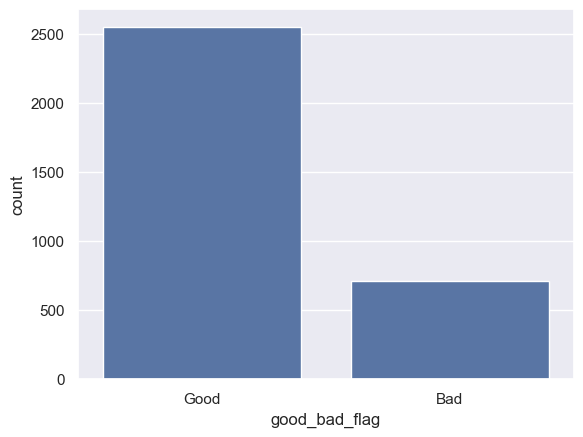

In [10]:
sns.countplot(x='good_bad_flag',data=filtered_data)

In [11]:
filtered_data.groupby('good_bad_flag').agg({'customerid':'nunique'})

,customerid
good_bad_flag,
Bad,711
Good,2553


### From the above data we have an imbalanced dataset.

# Qn How is age distributed?

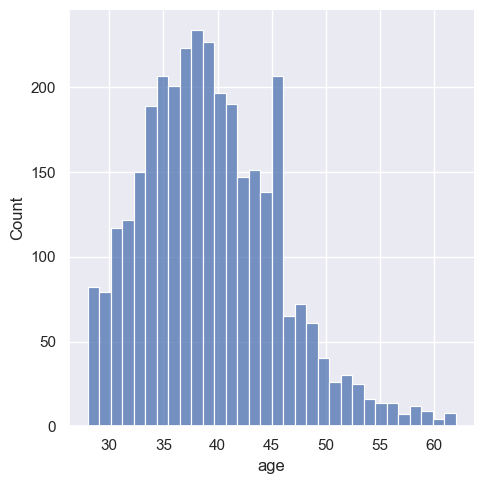

In [12]:
sns.displot(filtered_data['age'])

## How are customers distributed into different banks?

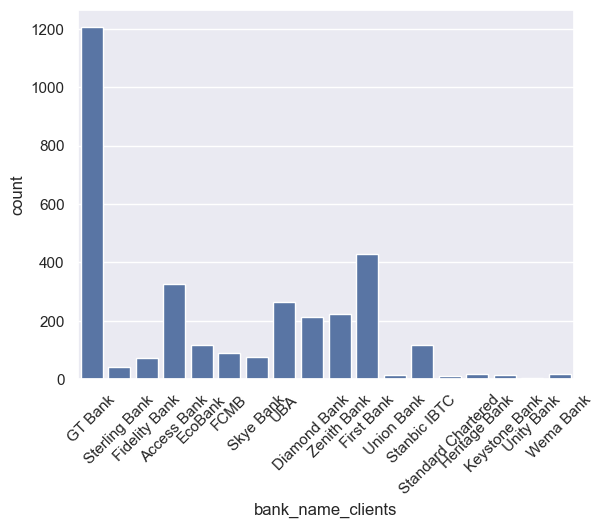

In [13]:
sns.countplot(x='bank_name_clients',data=filtered_data)
plt.xticks(rotation=45)
plt.show()

## How are they distributed in terms of employment?

<Axes: xlabel='employment_status_clients', ylabel='count'>

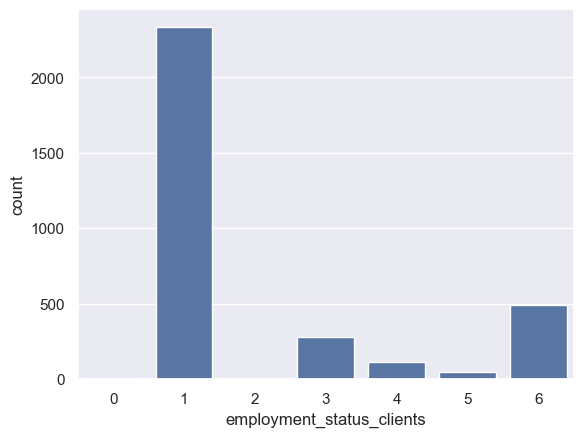

In [14]:
sns.countplot(x='employment_status_clients',data=filtered_data)

## QN How are they distributed in education ?

<Axes: xlabel='level_of_education_clients', ylabel='count'>

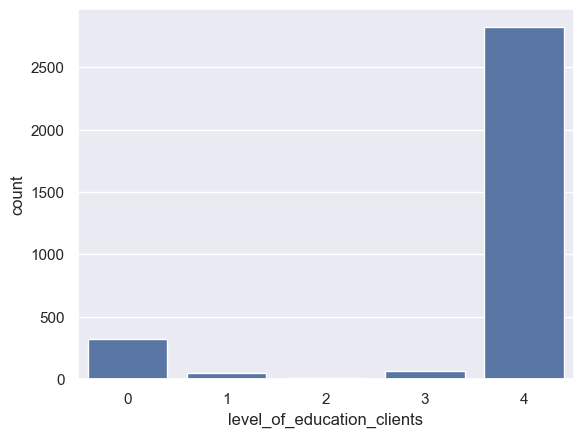

In [15]:
sns.countplot(x='level_of_education_clients',data=filtered_data)

# Qn How are the numerical columns distributed?

In [16]:
filtered_data.describe().T

,count,mean,std,min,25%,50%,75%,max
employment_status_clients,3264.0000,2.0806,1.8621,0.0000,1.0000,1.0000,3.0000,6.0000
level_of_education_clients,3264.0000,3.5392,1.2320,0.0000,4.0000,4.0000,4.0000,4.0000
No_of_prevloans,3264.0000,4.1890,3.6680,1.0000,1.0000,3.0000,6.0000,26.0000
Total_amount_borrowed,3264.0000,69412.6838,89963.6953,5000.0000,10000.0000,30000.0000,90000.0000,770000.0000
Total_amount_due,3264.0000,82316.9690,103488.7011,5750.0000,13000.0000,36000.0000,109600.0000,866300.0000
Average_termdays,3264.0000,25.3619,6.8688,15.0000,20.0000,27.8571,30.0000,60.0000
systemloanid,3264.0000,301980714.4400,13442.9857,301958485.0000,301968846.7500,301979414.0000,301993360.2500,302004050.0000
loannumber,3264.0000,5.1939,3.6682,2.0000,2.0000,4.0000,7.0000,27.0000
loanamount,3264.0000,17841.6054,10746.2743,10000.0000,10000.0000,10000.0000,20000.0000,60000.0000
totaldue,3264.0000,21290.9545,11930.9072,10000.0000,13000.0000,13000.0000,24500.0000,68100.0000


## How is data distributed among the differnt colums?

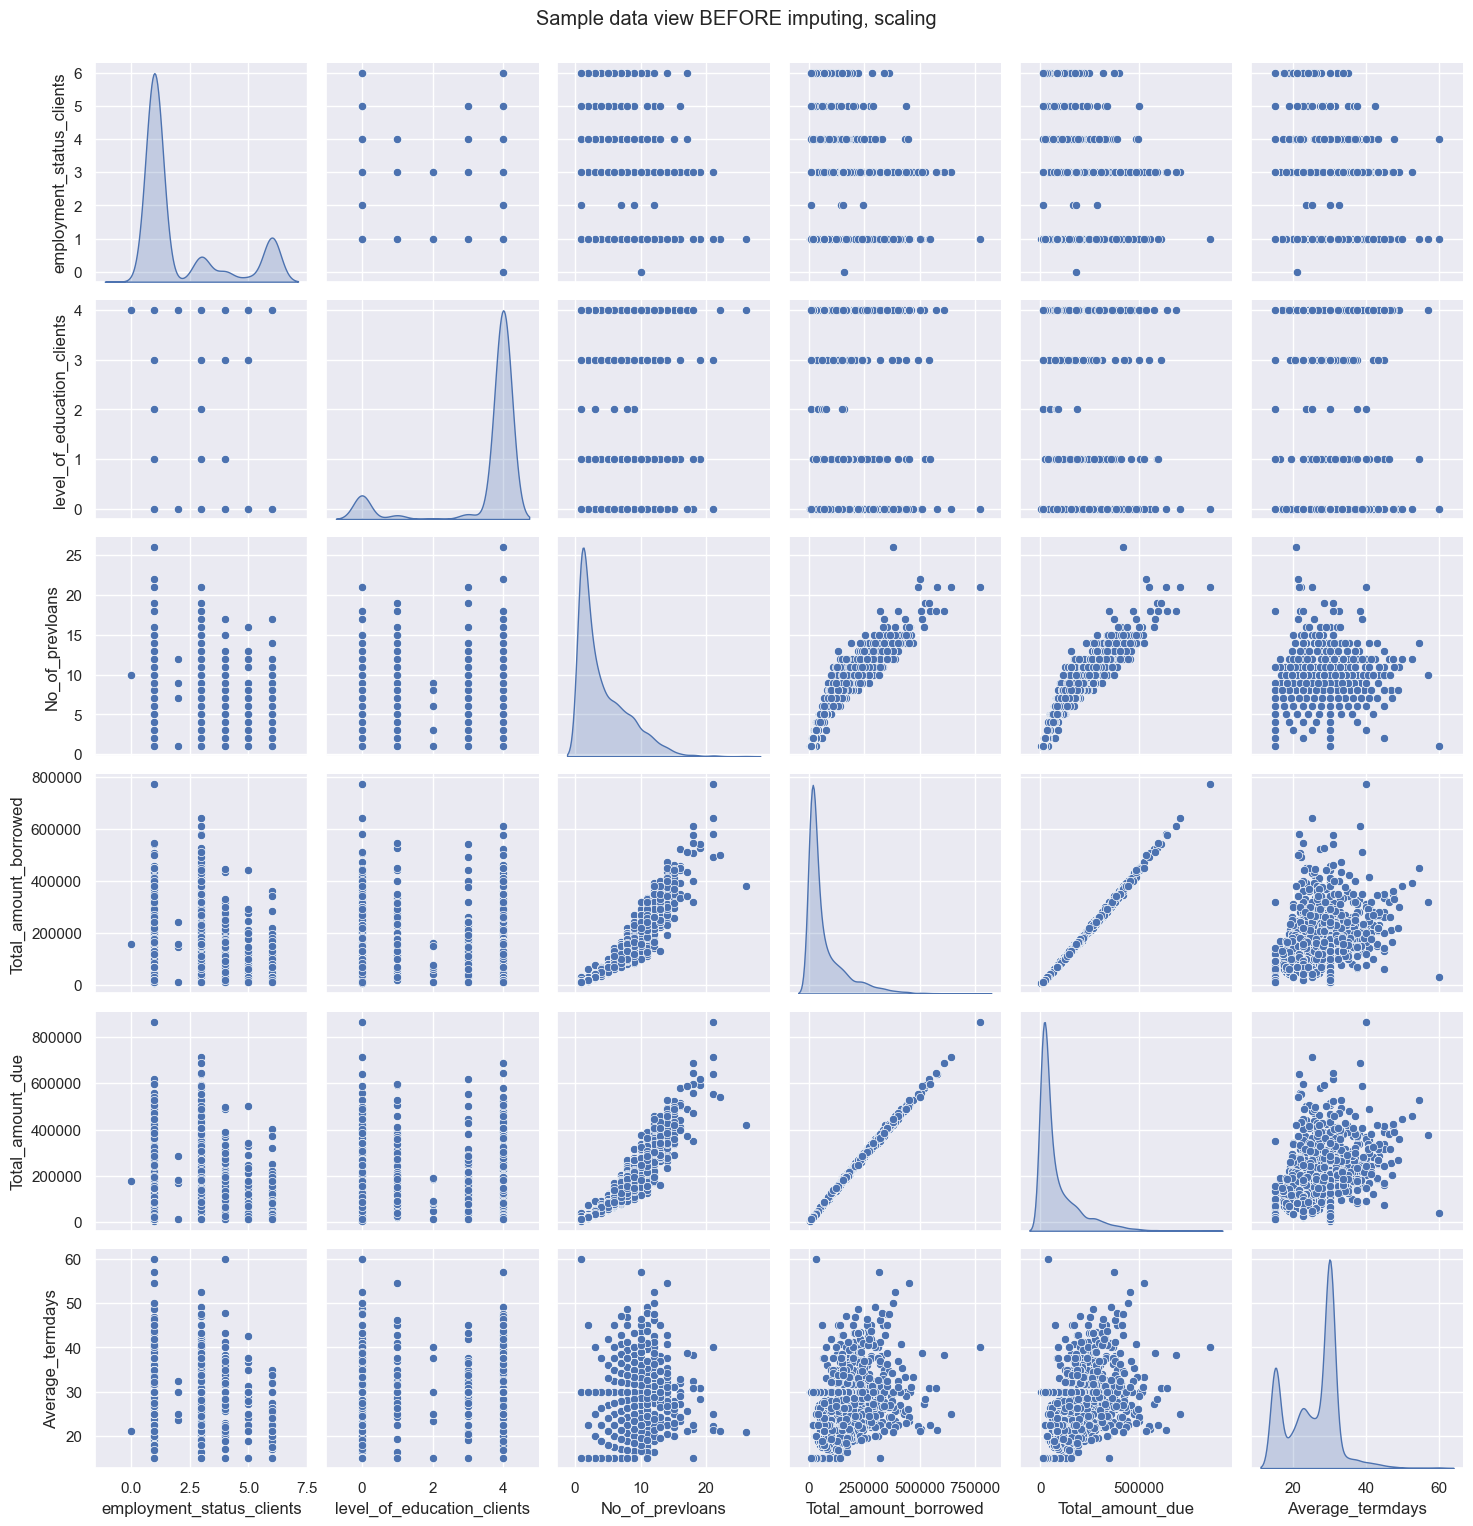

In [17]:
pr1plt = sns.pairplot(filtered_data.iloc[:, :10], diag_kind='kde')
pr1plt.fig.suptitle("Sample data view BEFORE imputing, scaling", y=1.02)
plt.show()
plt.close()

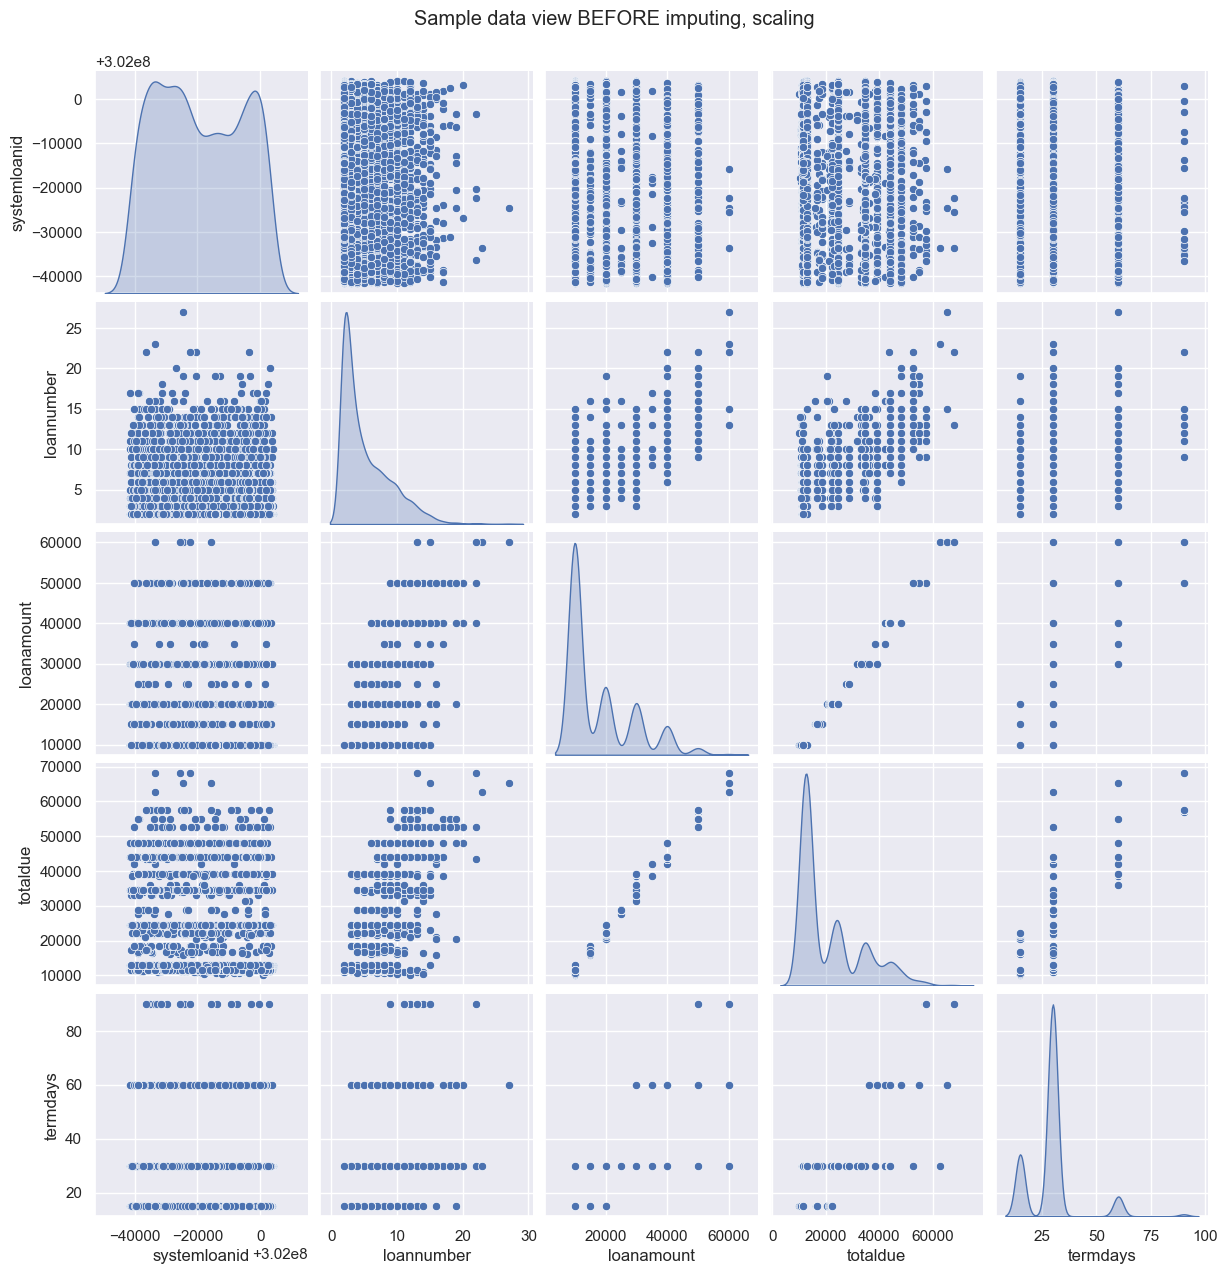

In [18]:
pr1plt = sns.pairplot(filtered_data.iloc[:, 10:20], diag_kind='kde')
pr1plt.fig.suptitle("Sample data view BEFORE imputing, scaling", y=1.02)
plt.show()
plt.close()

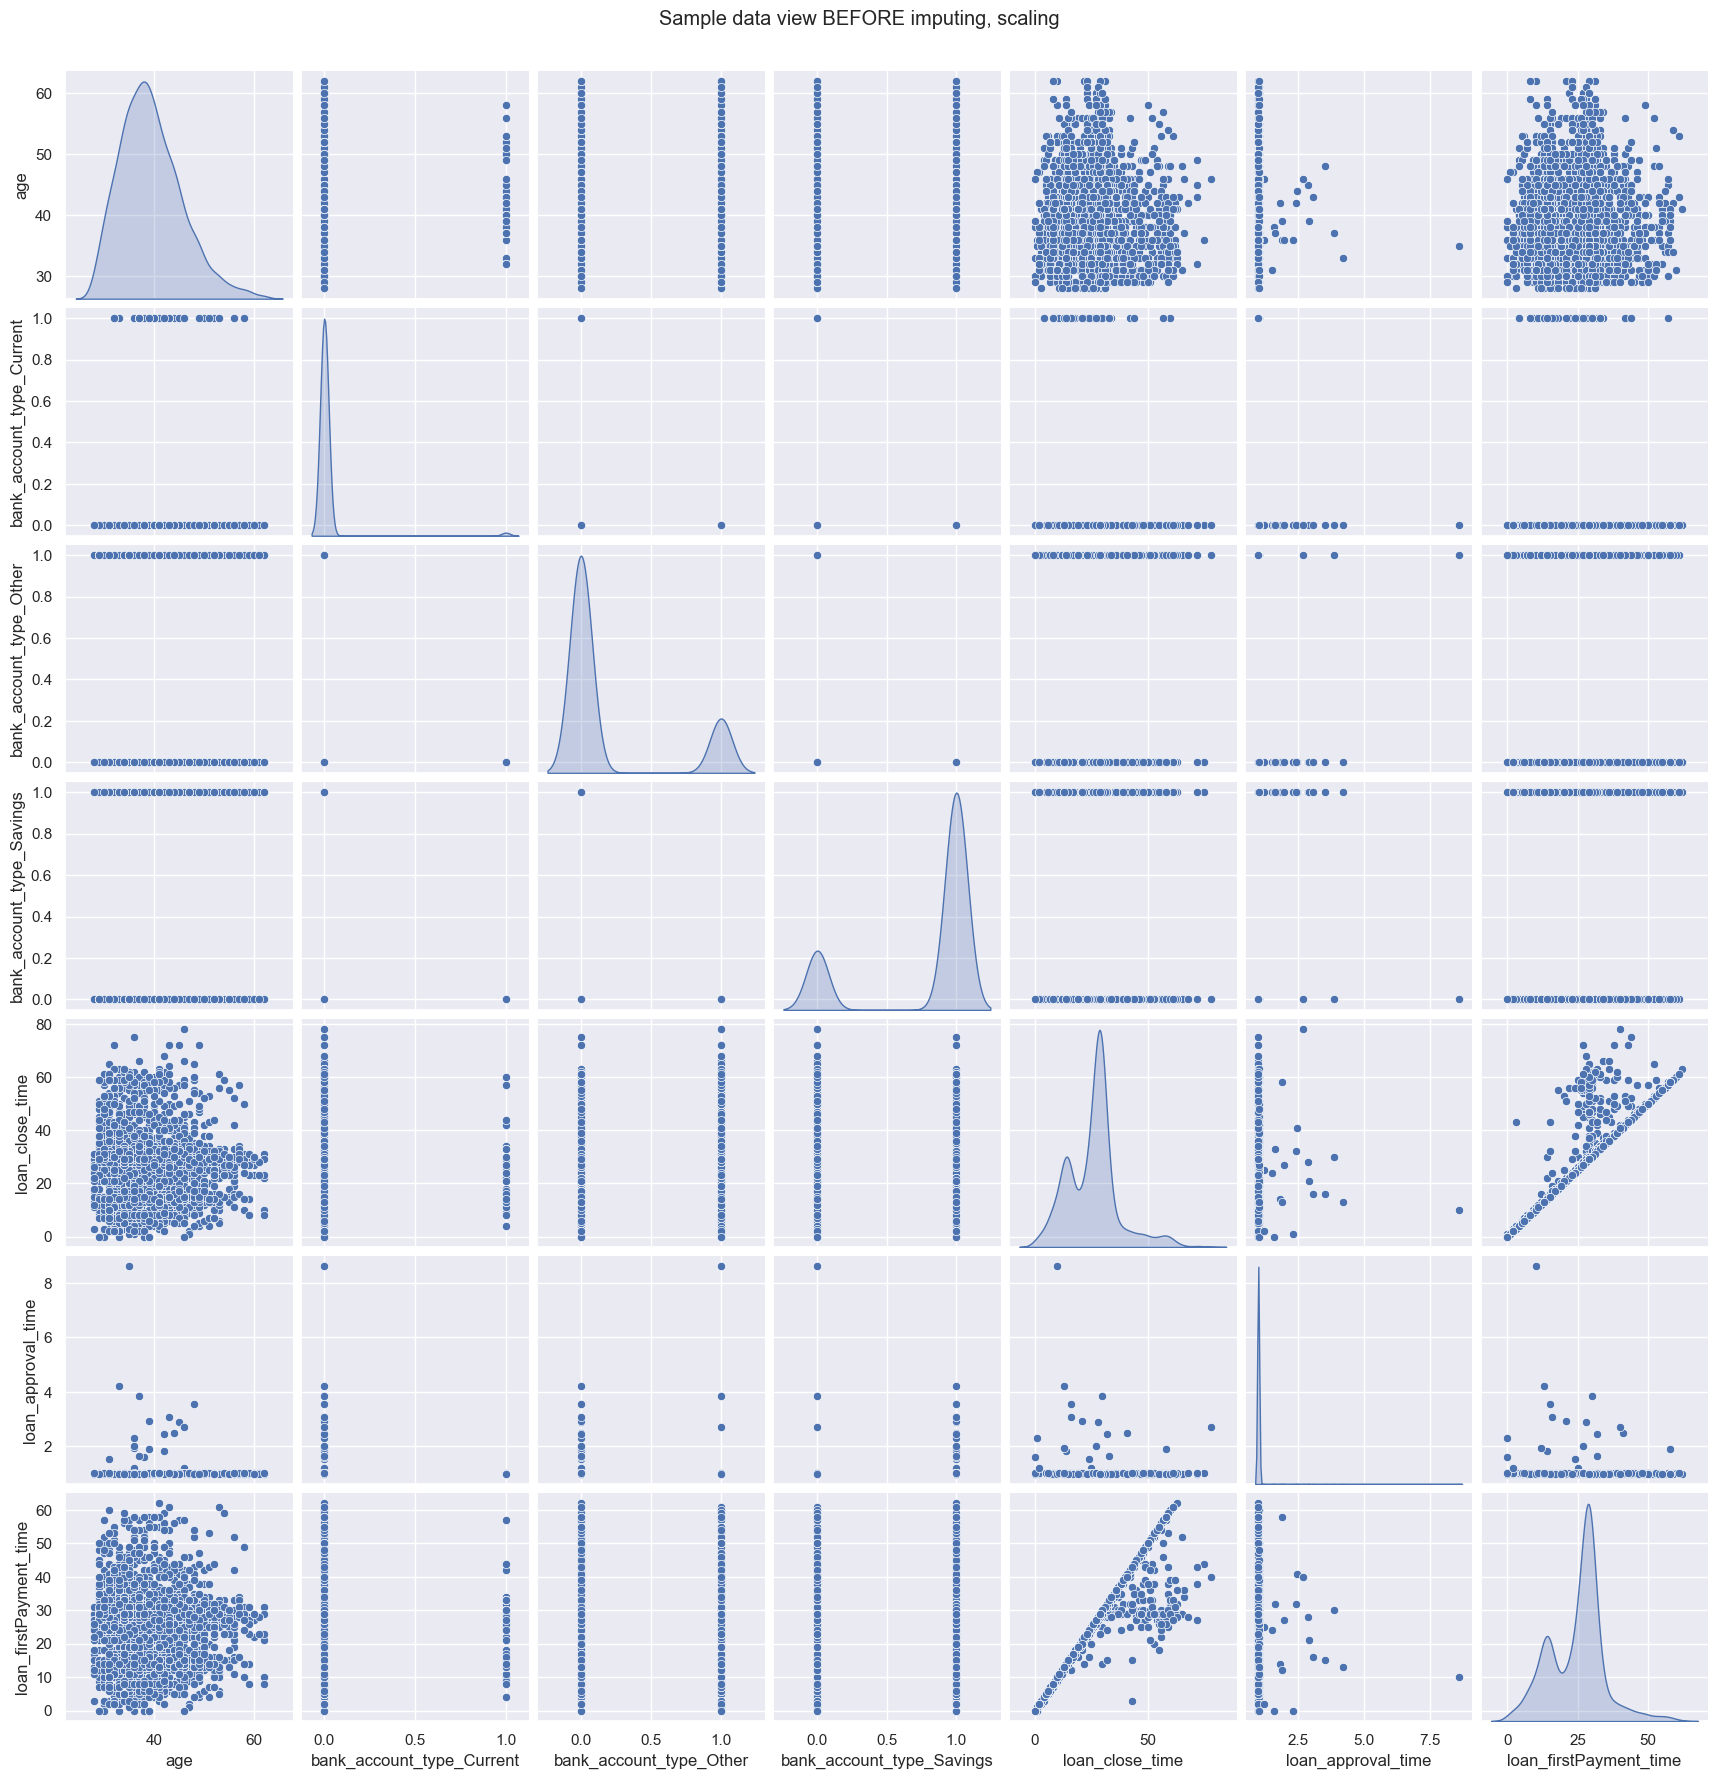

In [19]:
pr1plt = sns.pairplot(filtered_data.iloc[:, 20:30], diag_kind='kde')
pr1plt.fig.suptitle("Sample data view BEFORE imputing, scaling", y=1.02)
plt.show()
plt.close()

### From the above illustration we have outliers in our data 

In [20]:
filtered_data.head()

,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,Good,50.0000,False,False,True,15.0000,1.0186,15.0000
1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,Bad,38.0000,False,False,True,32.0000,1.0189,32.0000
2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,Good,37.0000,False,False,True,32.0000,1.0019,32.0000
3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,Good,32.0000,False,False,True,33.0000,1.0189,33.0000
6,8a858ea05a859123015a8892914d15b7,Access Bank,1,4,5.0000,70000.0000,88000.0000,30.0000,2017-06-27 13:07:32,2017-06-27 12:06:24,2017-07-21 21:57:17,2017-07-27 00:00:00.000000,2017-07-21 21:47:08,301992494.0000,6.0000,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0000,24500.0000,30.0000,Good,33.0000,False,False,True,24.0000,1.0189,24.0000


In [21]:
#Converting true or false to numeric
filtered_data["bank_account_type_Current"] =filtered_data["bank_account_type_Current"].astype(int)
filtered_data["bank_account_type_Other"] =filtered_data["bank_account_type_Other"].astype(int)
filtered_data["bank_account_type_Savings"] =filtered_data["bank_account_type_Savings"].astype(int)
filtered_data.head()

,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,Good,50.0000,0,0,1,15.0000,1.0186,15.0000
1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,Bad,38.0000,0,0,1,32.0000,1.0189,32.0000
2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,Good,37.0000,0,0,1,32.0000,1.0019,32.0000
3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,Good,32.0000,0,0,1,33.0000,1.0189,33.0000
6,8a858ea05a859123015a8892914d15b7,Access Bank,1,4,5.0000,70000.0000,88000.0000,30.0000,2017-06-27 13:07:32,2017-06-27 12:06:24,2017-07-21 21:57:17,2017-07-27 00:00:00.000000,2017-07-21 21:47:08,301992494.0000,6.0000,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0000,24500.0000,30.0000,Good,33.0000,0,0,1,24.0000,1.0189,24.0000


In [22]:
# Label enconding good and bad flag
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
filtered_data['good_bad_flag']= label_encoder.fit_transform(filtered_data['good_bad_flag'])
filtered_data.head()

,customerid,bank_name_clients,employment_status_clients,level_of_education_clients,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,GT Bank,6,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,1,50.0000,0,0,1,15.0000,1.0186,15.0000
1,8a858e275c7ea5ec015c82482d7c3996,Sterling Bank,1,4,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,0,38.0000,0,0,1,32.0000,1.0189,32.0000
2,8a858e5b5bd99460015bdc95cd485634,Fidelity Bank,6,4,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,1,37.0000,0,0,1,32.0000,1.0019,32.0000
3,8a858efd5ca70688015cabd1f1e94b55,GT Bank,1,4,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,1,32.0000,0,0,1,33.0000,1.0189,33.0000
6,8a858ea05a859123015a8892914d15b7,Access Bank,1,4,5.0000,70000.0000,88000.0000,30.0000,2017-06-27 13:07:32,2017-06-27 12:06:24,2017-07-21 21:57:17,2017-07-27 00:00:00.000000,2017-07-21 21:47:08,301992494.0000,6.0000,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0000,24500.0000,30.0000,1,33.0000,0,0,1,24.0000,1.0189,24.0000


In [23]:
filtered_data.columns

Index(['customerid', 'bank_name_clients', 'employment_status_clients', 'level_of_education_clients', 'No_of_prevloans', 'Total_amount_borrowed', 'Total_amount_due', 'Average_termdays', 'last_approveddate', 'last_creationdate', 'last_closeddate', 'last_firstduedate', 'last_firstrepaiddate', 'systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'age', 'bank_account_type_Current', 'bank_account_type_Other', 'bank_account_type_Savings', 'loan_close_time', 'loan_approval_time', 'loan_firstPayment_time'], dtype='object')

In [24]:
#Dropping columns that are likely causing bias
filtered_data=filtered_data.drop(['bank_name_clients','employment_status_clients','level_of_education_clients'],axis=1)
filtered_data.columns

Index(['customerid', 'No_of_prevloans', 'Total_amount_borrowed', 'Total_amount_due', 'Average_termdays', 'last_approveddate', 'last_creationdate', 'last_closeddate', 'last_firstduedate', 'last_firstrepaiddate', 'systemloanid', 'loannumber', 'approveddate', 'creationdate', 'loanamount', 'totaldue', 'termdays', 'good_bad_flag', 'age', 'bank_account_type_Current', 'bank_account_type_Other', 'bank_account_type_Savings', 'loan_close_time', 'loan_approval_time', 'loan_firstPayment_time'], dtype='object')

In [25]:
filtered_data.head()

,customerid,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_approveddate,last_creationdate,last_closeddate,last_firstduedate,last_firstrepaiddate,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,1.0000,10000.0000,11500.0000,15.0000,2017-06-19 17:55:26,2017-06-19 16:54:19,2017-07-04 18:09:47,2017-07-05 00:00:00.000000,2017-07-04 17:59:36,301964962.0000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,1,50.0000,0,0,1,15.0000,1.0186,15.0000
1,8a858e275c7ea5ec015c82482d7c3996,1.0000,10000.0000,13000.0000,30.0000,2017-06-07 12:47:30,2017-06-07 11:46:22,2017-07-10 08:52:54,2017-07-07 00:00:00.000000,2017-07-10 08:42:44,301972172.0000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,0,38.0000,0,0,1,32.0000,1.0189,32.0000
2,8a858e5b5bd99460015bdc95cd485634,3.0000,30000.0000,36000.0000,20.0000,2017-06-08 11:49:34,2017-06-08 10:49:27,2017-07-11 10:12:20,2017-07-10 00:00:00.000000,2017-07-11 10:02:11,301976271.0000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,1,37.0000,0,0,1,32.0000,1.0019,32.0000
3,8a858efd5ca70688015cabd1f1e94b55,1.0000,10000.0000,11500.0000,15.0000,2017-06-15 14:05:26,2017-06-15 13:04:18,2017-07-18 19:24:13,2017-06-30 00:00:00.000000,2017-07-18 19:14:05,301997763.0000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,1,32.0000,0,0,1,33.0000,1.0189,33.0000
6,8a858ea05a859123015a8892914d15b7,5.0000,70000.0000,88000.0000,30.0000,2017-06-27 13:07:32,2017-06-27 12:06:24,2017-07-21 21:57:17,2017-07-27 00:00:00.000000,2017-07-21 21:47:08,301992494.0000,6.0000,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0000,24500.0000,30.0000,1,33.0000,0,0,1,24.0000,1.0189,24.0000


In [26]:
#Dropping irrelevant columns
filtered_data=filtered_data.drop(['last_approveddate','last_creationdate','last_closeddate','last_firstrepaiddate','systemloanid'],axis=1)

In [27]:
filtered_data.shape

(3264, 20)

In [28]:
filtered_data.head()

,customerid,No_of_prevloans,Total_amount_borrowed,Total_amount_due,Average_termdays,last_firstduedate,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,age,bank_account_type_Current,bank_account_type_Other,bank_account_type_Savings,loan_close_time,loan_approval_time,loan_firstPayment_time
0,8a858e135cb22031015cbafc76964ebd,1.0000,10000.0000,11500.0000,15.0000,2017-07-05 00:00:00.000000,2.0000,2017-07-05 14:29:48.000000,2017-07-05 13:29:42.000000,10000.0000,13000.0000,30.0000,1,50.0000,0,0,1,15.0000,1.0186,15.0000
1,8a858e275c7ea5ec015c82482d7c3996,1.0000,10000.0000,13000.0000,30.0000,2017-07-07 00:00:00.000000,2.0000,2017-07-10 21:21:46.000000,2017-07-10 20:21:40.000000,10000.0000,13000.0000,30.0000,0,38.0000,0,0,1,32.0000,1.0189,32.0000
2,8a858e5b5bd99460015bdc95cd485634,3.0000,30000.0000,36000.0000,20.0000,2017-07-10 00:00:00.000000,4.0000,2017-07-13 15:40:27.000000,2017-07-13 14:40:19.000000,10000.0000,13000.0000,30.0000,1,37.0000,0,0,1,32.0000,1.0019,32.0000
3,8a858efd5ca70688015cabd1f1e94b55,1.0000,10000.0000,11500.0000,15.0000,2017-06-30 00:00:00.000000,2.0000,2017-07-26 21:03:17.000000,2017-07-26 20:03:09.000000,10000.0000,11500.0000,15.0000,1,32.0000,0,0,1,33.0000,1.0189,33.0000
6,8a858ea05a859123015a8892914d15b7,5.0000,70000.0000,88000.0000,30.0000,2017-07-27 00:00:00.000000,6.0000,2017-07-23 21:44:43.000000,2017-07-23 20:44:36.000000,20000.0000,24500.0000,30.0000,1,33.0000,0,0,1,24.0000,1.0189,24.0000


In [29]:
filtered_data=filtered_data.drop(['approveddate','creationdate'],axis=1)

In [30]:
filtered_data=filtered_data.drop(['last_firstduedate'],axis=1)

In [31]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3264 entries, 0 to 4330
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 3264 non-null   object 
 1   No_of_prevloans            3264 non-null   float64
 2   Total_amount_borrowed      3264 non-null   float64
 3   Total_amount_due           3264 non-null   float64
 4   Average_termdays           3264 non-null   float64
 5   loannumber                 3264 non-null   float64
 6   loanamount                 3264 non-null   float64
 7   totaldue                   3264 non-null   float64
 8   termdays                   3264 non-null   float64
 9   good_bad_flag              3264 non-null   int32  
 10  age                        3264 non-null   float64
 11  bank_account_type_Current  3264 non-null   int32  
 12  bank_account_type_Other    3264 non-null   int32  
 13  bank_account_type_Savings  3264 non-null   int32  
 1

## Qn Do we have columns that are related?

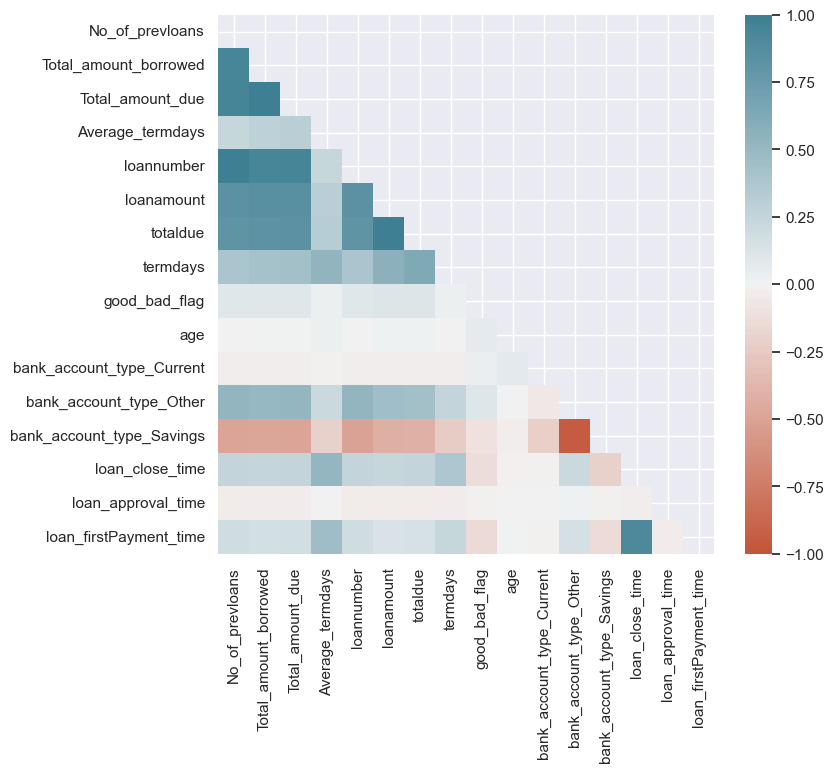

In [32]:
from sklearn.preprocessing import StandardScaler
# Method to scale data
def scale_dt(dt):
    X_std    = StandardScaler().fit_transform(dt)
    dt_cols  = (dt.columns).tolist()
    X_std    = pd.DataFrame(X_std, columns=dt_cols)
    return X_std
# method to plot heatmap
def plot_heatmap(correlation):
    mask = np.triu(np.ones_like(correlation.corr(), dtype=bool))
    fig , ax = plt.subplots(figsize = (8,7))
    ax = sns.heatmap(correlation, cmap=sns.diverging_palette(20, 220, n=200), annot=False, mask=mask,vmin=-1, vmax=1)
# method for correlation
def get_correlation(dt):
    if 'customerid' in dt.columns:
        dt = dt.drop('customerid', axis = 1)
    X_std  = scale_dt(dt)
    corr   = X_std.corr()
    return corr

cor = get_correlation(filtered_data)
plot_heatmap(cor)

## From the above, chances are high that collineality exists

In [33]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# remove outliers 
def remove_outliers(data):
    filtered_data = pd.DataFrame()
    for column in data.columns:
        if column not in ['good_bad_flag','bank_account_type_Current','bank_account_type_Other','bank_account_type_Savings']:  # Check if the column is not the label column
            # Calculate first quartile (Q1) and third quartile (Q3) for each column
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            
            # Calculate interquartile range (IQR) for each column
            IQR = Q3 - Q1
            
            # Define lower and upper bounds to identify outliers for each column
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filter outliers for each column
            filtered_column = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
            filtered_data[column] = filtered_column[column]
        else:
            filtered_data[column] = data[column]  # Copy label column directly
    
    return filtered_data

#Method to check multicollinaelity
def drop_columns_with_high_vif(data,threshold=15):
    if 'customerid' in data.columns:
        data = data.drop(['customerid','good_bad_flag'], axis = 1)
    data=remove_outliers(data)
    data=data.fillna(0)
    vif_data = pd.DataFrame()
    vif_data["feature"] = data.columns
    # calculating VIF for each feature
    X = add_constant(data)
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(data.columns))]
    vif_data
    high_vif=vif_data[vif_data["VIF"]>threshold]
    return vif_data,high_vif.feature

In [34]:
vif_data,colums_to_drop=drop_columns_with_high_vif(filtered_data)
vif_data

,feature,VIF
0,No_of_prevloans,0.0000
1,Total_amount_borrowed,1791.4634
2,Total_amount_due,13.8401
3,Average_termdays,14.0321
4,loannumber,1.3539
5,loanamount,1794.6033
6,totaldue,39.4842
7,termdays,38.4177
8,age,1.2176
9,bank_account_type_Current,1.0048


In [35]:
colums_to_drop

1         Total_amount_borrowed
5                    loanamount
6                      totaldue
7                      termdays
10      bank_account_type_Other
11    bank_account_type_Savings
12              loan_close_time
Name: feature, dtype: object

In [36]:
#removing columns with high Variance Influencing Factor figures 
filtered_data=filtered_data.drop(colums_to_drop.to_list(),axis=1)

## Feature selection

In [37]:
from imblearn.under_sampling import NearMiss 
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score, auc, RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
import gc
nr = NearMiss(version=3,n_neighbors_ver3=3)
scaler=StandardScaler()

In [38]:
#removing customer id 
filtered_data=filtered_data.drop('customerid', axis = 1)

In [39]:
filtered_data.to_csv(r'Datasets\filtered_data_sk.csv',index=False)

In [40]:
#Undersampling
y = filtered_data["good_bad_flag"]
x = filtered_data.drop(columns="good_bad_flag")
# resampling to remove imbalance
x,y =nr.fit_resample(x,y=y)
counter=Counter(y)
print(counter)

Counter({0: 711, 1: 711})


In [41]:
"""
To reduce the number of features,improve its performance and avoid overfitting.
implemented mutual_info_classif algorithm
Ref: https://medium.com/@Kavya2099/optimizing-performance-selectkbest-for-efficient-feature-selection-in-machine-learning-3b635905ed48

"""
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2
mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

loannumber                  0.0983
No_of_prevloans             0.0978
Total_amount_due            0.0582
Average_termdays            0.0542
loan_approval_time          0.0274
bank_account_type_Current   0.0207
loan_firstPayment_time      0.0056
age                         0.0000
Name: MI Scores, dtype: float64

### Using Recursive feature elimination

In [42]:
from sklearn.feature_selection import RFECV
# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x.columns[rfecv.support_])

Optimal number of features : 8
Best features : Index(['No_of_prevloans', 'Total_amount_due', 'Average_termdays', 'loannumber', 'age', 'bank_account_type_Current', 'loan_approval_time', 'loan_firstPayment_time'], dtype='object')


In [43]:
from sklearn.feature_selection import RFE
import pprint
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=74, step=1)
rfe = rfe.fit(x, y)
print('Chosen best features by rfe:',x.columns[rfe.support_])

Chosen best features by rfe: Index(['No_of_prevloans', 'Total_amount_due', 'Average_termdays', 'loannumber', 'age', 'bank_account_type_Current', 'loan_approval_time', 'loan_firstPayment_time'], dtype='object')


Feature ranking:
1. feature 7 (0.229542)
2. feature 4 (0.195072)
3. feature 1 (0.173477)
4. feature 6 (0.120580)
5. feature 3 (0.096774)
6. feature 0 (0.093524)
7. feature 2 (0.086336)
8. feature 5 (0.004694)


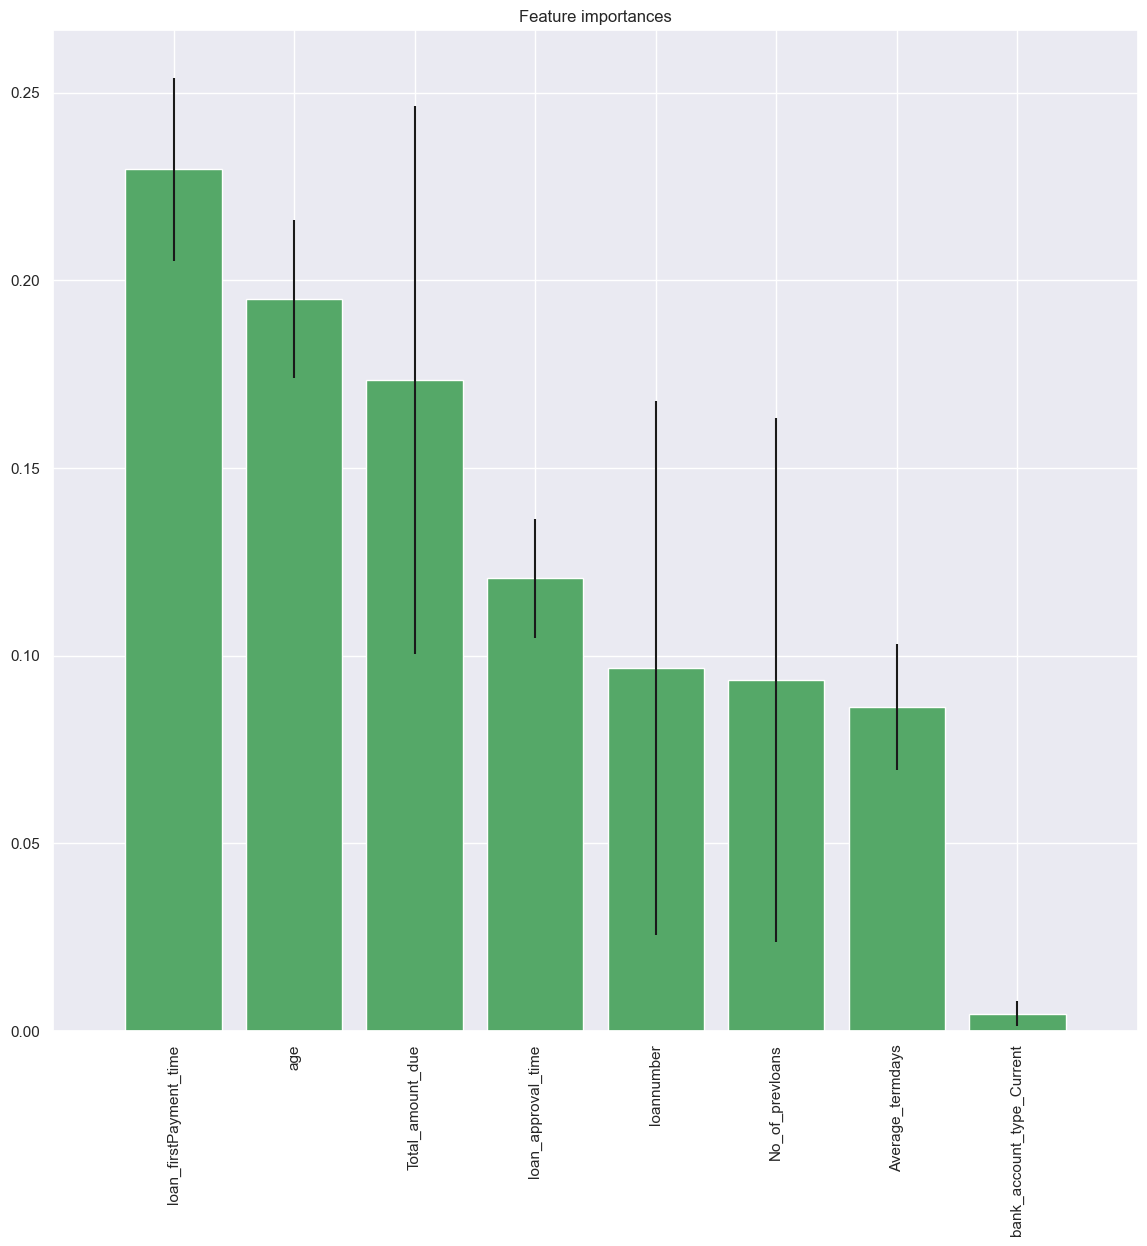

In [44]:
""""
Ref: https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization

"""
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x,y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices],rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()
